# Online Retail II Dataset Overview
## Link To My Tableau Dashboard
https://public.tableau.com/app/profile/naren.karthikeya/viz/RFMCustomerSegmentationDashBoardOfOnlineRetailStore/RFMAnalysisOfOnlineRetailStore
## Context
This dataset, **Online Retail II**, encompasses all transactions from a UK-based and registered, non-store online retail between December 1, 2009, and December 9, 2011. The company's focus is on selling unique gift-ware suitable for all occasions, with a significant proportion of its customer base being wholesalers.

## Content

### Attribute Information:

1. **InvoiceNo**: 
   - *Description*: Invoice number.
   - *Type*: Nominal.
   - *Details*: A 6-digit integral number uniquely assigned to each transaction. Transactions starting with 'c' are cancellations.

2. **StockCode**: 
   - *Description*: Product (item) code.
   - *Type*: Nominal.
   - *Details*: A 5-digit integral number assigned to each distinct product.

3. **Description**: 
   - *Description*: Product (item) name.
   - *Type*: Nominal.

4. **Quantity**: 
   - *Description*: The quantity of each product per transaction.
   - *Type*: Numeric.

5. **InvoiceDate**: 
   - *Description*: Invoice date and time.
   - *Type*: Numeric.
   - *Details*: Represents the day and time when a transaction was generated.

6. **UnitPrice**: 
   - *Description*: Unit price of the product.
   - *Type*: Numeric.
   - *Details*: Product price per unit in sterling (£).

7. **CustomerID**: 
   - *Description*: Customer number.
   - *Type*: Nominal.
   - *Details*: A 5-digit integral number uniquely assigned to each customer.

8. **Country**: 
   - *Description*: Country name.
   - *Type*: Nominal.
   - *Details*: The country where the customer resides.


### Import Essential Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, PowerTransformer,MinMaxScaler
from scipy.stats import skew
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("online_retail_II.csv")

In [3]:
df=data.copy()

### Exploratory Data Analysis And Data Preprocessing

In [4]:
df.shape

(1067371, 8)

In [5]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
print("Null values in data")
print(df.isnull().sum())

Null values in data
Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


In [7]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [8]:
# Lets drop the missing customer IDs
df = df.dropna(subset=['Customer ID'])

In [9]:
print("Null values in data")
print(df.isnull().sum())

Null values in data
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [10]:
print("Number of Customers:",df['Customer ID'].nunique())

print("Number of Invoice:",df['Invoice'].nunique())

print("Total Number of Products sold in 2 years:",df['Quantity'].sum())

print("Total Revenue of Sales in 2 years:",((df['Quantity']*df['Price']).sum()).astype(int))

Number of Customers: 5942
Number of Invoice: 44876
Total Number of Products sold in 2 years: 10234128
Total Revenue of Sales in 2 years: 16648292


In [11]:
df['Description'].value_counts().sort_values(ascending=False)

WHITE HANGING HEART T-LIGHT HOLDER    5315
REGENCY CAKESTAND 3 TIER              3777
ASSORTED COLOUR BIRD ORNAMENT         2794
JUMBO BAG RED RETROSPOT               2776
LUNCH BAG  BLACK SKULL.               2161
                                      ... 
F.FAIRY S/3 SML CANDLE, LAVENDER         1
ENGLISH ROSE TEA FOR ONE GIFT BOX        1
MUG PINK AND PURPLE ARABIC DESIGN        1
11 PC CERAMIC TEA SET POLKADOT           1
BLUE BAROQUE FLOCK CANDLE HOLDER         1
Name: Description, Length: 5299, dtype: int64

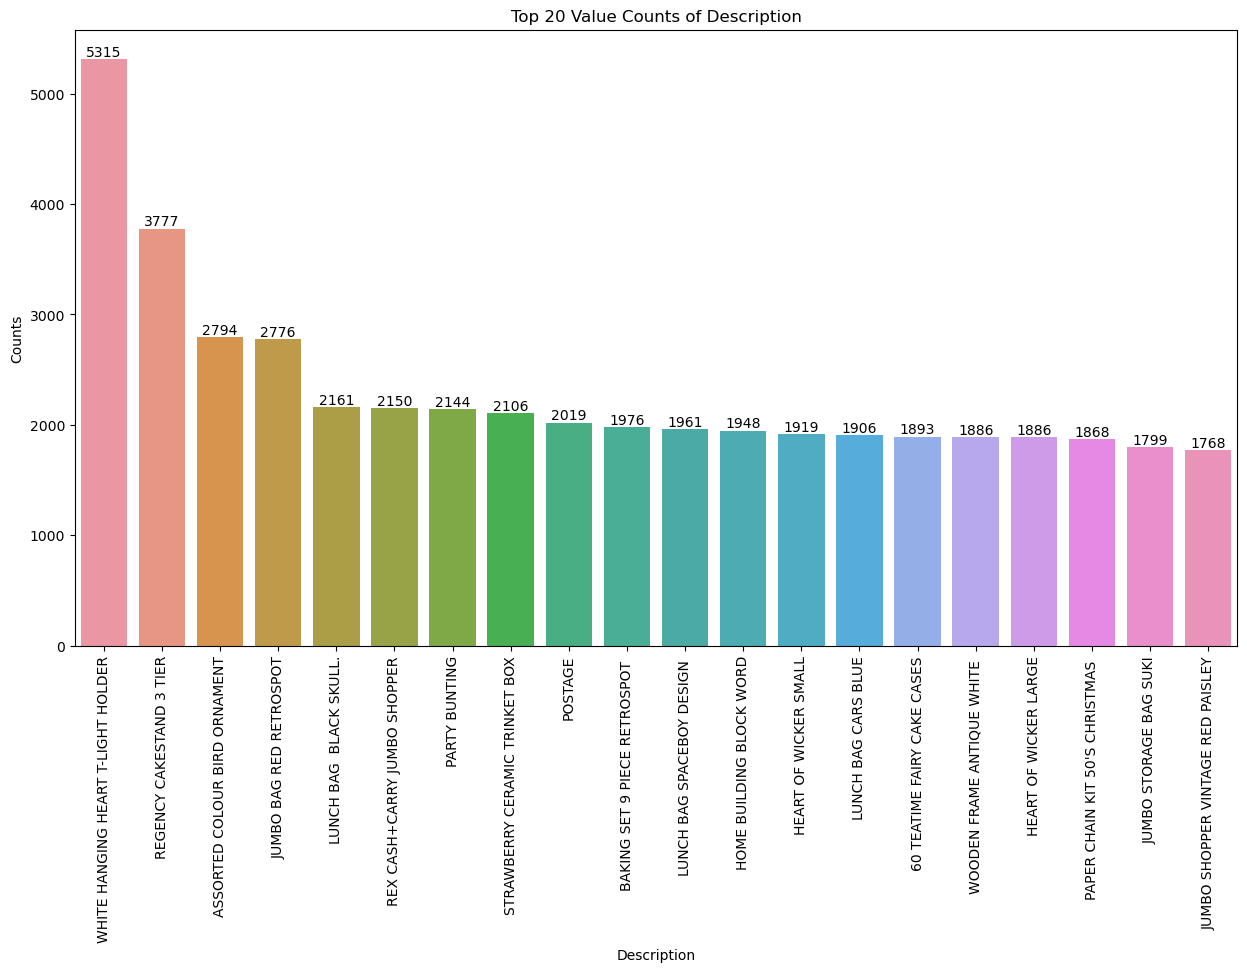

In [12]:
# Compute value counts and select the top 20
description_counts = df['Description'].value_counts().head(20)

plt.figure(figsize=(15, 8))
bars = sns.barplot(x=description_counts.index, y=description_counts.values)

# Adding numbers on top of each bar Simplified way to add annotations
for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}',(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom')
    #height of the bar is converted directly to an integer
    # and formatted as a string using an f-string 
    # text is still positioned at the center of the bar's width
    #   (bar.get_x() + bar.get_width() / 2) and at the top of the bar (bar.get_height()).
    #  horizontal alignment is set to 'center', and the vertical alignment is set to 'bottom'
plt.xlabel('Description')
plt.ylabel('Counts')
plt.title('Top 20 Value Counts of Description')
plt.xticks(rotation=90)
plt.show()


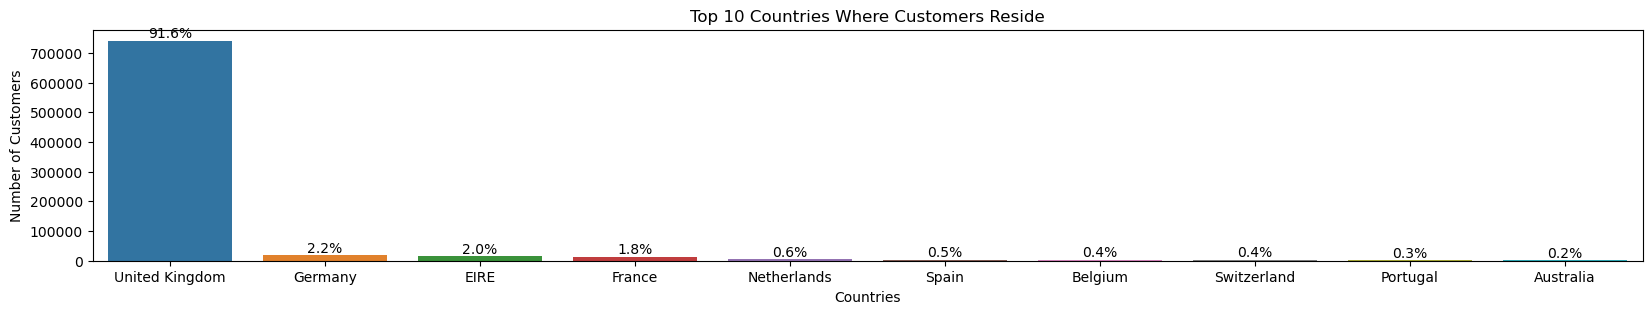

In [13]:
country_counts = df['Country'].value_counts().head(10)
total = country_counts.sum()  # Total count for calculating percentage

plt.figure(figsize=(20, 3))
bars = sns.barplot(x=country_counts.index, y=country_counts.values)

# Adding percentage on top of each bar
for bar in bars.patches:
    percentage = f'{100 * bar.get_height() / total:.1f}%'  # Calculate percentage and format it
    # Annotate the percentage on top of each bar
    bars.annotate(percentage, (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom')

plt.xlabel('Countries')
plt.ylabel('Number of Customers')
plt.title('Top 10 Countries Where Customers Reside')
plt.show()

In [14]:
df['TotalPrice']= df['Quantity']*df['Price']

In [15]:

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [16]:
# Transactions starting with 'c' are cancellations.
df[df['Quantity']<0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.4
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.9
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-17.0
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-12.6
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.4


In [17]:
# Filter out rows where 'Invoice' starts with 'C'
df = df[~df['Invoice'].astype(str).str.startswith('C')]

In [18]:
df[df['Price']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice


In [19]:
df.shape  # from (1067371, 8) shape to (805620, 9)

(805620, 9)

In [20]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [21]:
df['YearMonth'] = df['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))

### Feature Engineering - Creating RFM DataFrame

In [22]:
frequency= df.groupby('Customer ID')['Invoice'].count()
frequency= frequency.reset_index()
frequency.head()

,Customer ID,Invoice
0,12346.0,34
1,12347.0,253
2,12348.0,51
3,12349.0,175
4,12350.0,17


In [23]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')
df['InvoiceDate'].head()

0   2009-12-01 07:45:00
1   2009-12-01 07:45:00
2   2009-12-01 07:45:00
3   2009-12-01 07:45:00
4   2009-12-01 07:45:00
Name: InvoiceDate, dtype: datetime64[ns]

In [24]:
df['Diff']= max(df['InvoiceDate'])-df['InvoiceDate']
recency = df.groupby('Customer ID')['Diff'].min()

In [25]:
recency = recency.reset_index()
recency.head()

,Customer ID,Diff
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [26]:
recency['Diff'] = recency['Diff'].dt.days
recency.head()

,Customer ID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [27]:
monetary = df.groupby('Customer ID')['TotalPrice'].sum()
monetary = monetary.reset_index()
monetary.head()

,Customer ID,TotalPrice
0,12346.0,77556.46
1,12347.0,5633.32
2,12348.0,2019.40
3,12349.0,4428.69
4,12350.0,334.40


In [28]:
rfm=pd.merge(recency,frequency,on='Customer ID',how='inner')

In [29]:
rfm=pd.merge(rfm,monetary,on='Customer ID',how='inner')

In [30]:
rfm.head()

,Customer ID,Diff,Invoice,TotalPrice
0,12346.0,325,34,77556.46
1,12347.0,1,253,5633.32
2,12348.0,74,51,2019.40
3,12349.0,18,175,4428.69
4,12350.0,309,17,334.40


In [31]:
rfm.columns=['Customer ID','Recency','Frequency','Monetary']

In [68]:
print("Size of RFM",rfm.shape)
rfm.head()

Size of RFM (5768, 3)


,Recency,Frequency,Monetary
1,1,253,5633.32
2,74,51,2019.40
3,18,175,4428.69
4,309,17,334.40
5,374,21,300.93


### EDA And Data Cleaning Of RFM Dataframe 

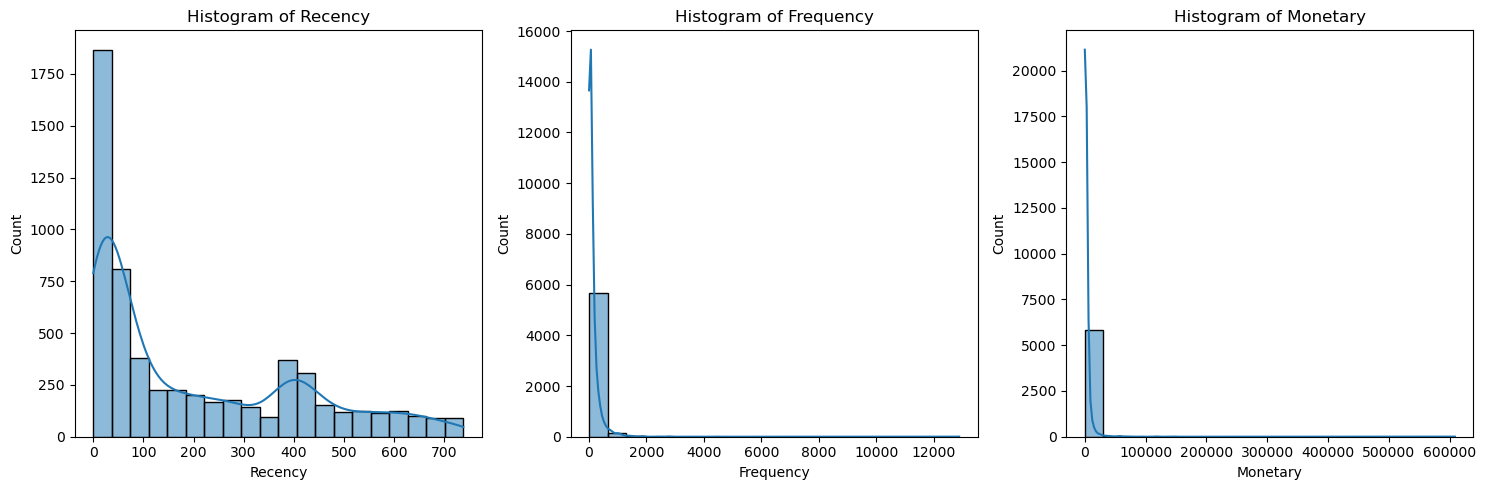

In [33]:
plt.figure(figsize=(15, 5))
# Draw the histograms
for i, column in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.histplot(rfm[column], kde=True, bins=20)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

In [34]:
from scipy.stats import skew
print(rfm.skew())

Customer ID     0.001787
Recency         0.886792
Frequency      18.058616
Monetary       25.320187
dtype: float64


In [35]:
rfm.drop(['Customer ID'],axis=1,inplace=True)
rfm.head()

,Recency,Frequency,Monetary
0,325,34,77556.46
1,1,253,5633.32
2,74,51,2019.40
3,18,175,4428.69
4,309,17,334.40


In [36]:
# Removing (statistical) outliers for Monetary
Q1 = rfm.Monetary.quantile(0.05)
Q3 = rfm.Monetary.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Monetary >= Q1 - 1.5*IQR) & (rfm.Monetary <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

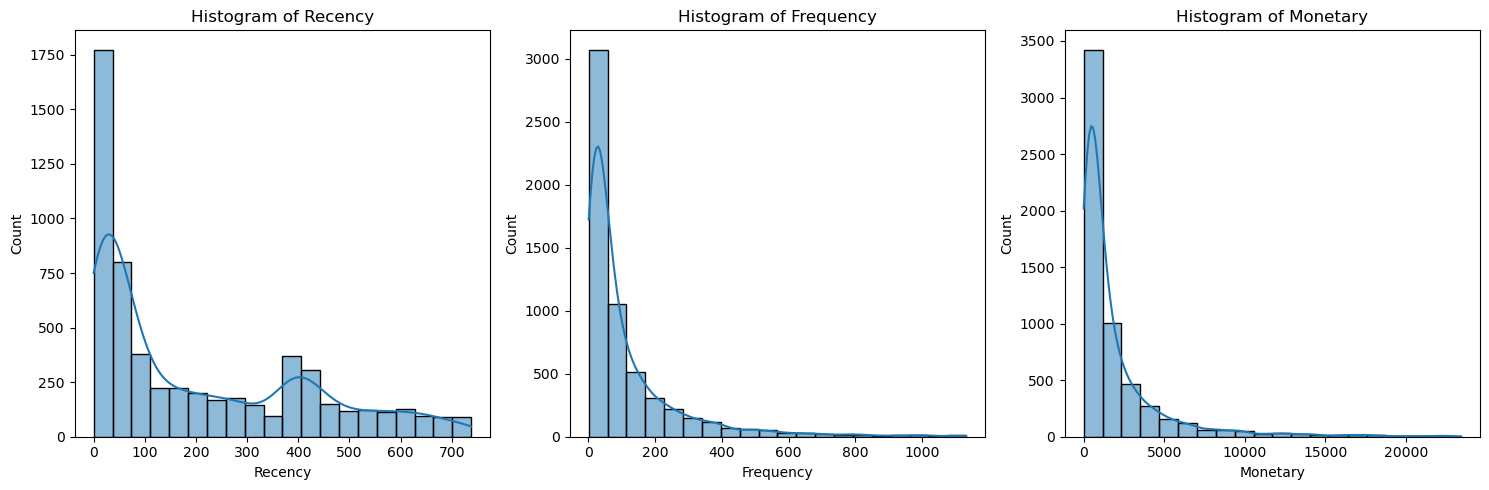

In [37]:
plt.figure(figsize=(15, 5))
# Draw the histograms
for i, column in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.histplot(rfm[column], kde=True, bins=20)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

In [38]:
rfm.skew()

Recency      0.865492
Frequency    2.894993
Monetary     3.305703
dtype: float64

### Yeo-Johnson Transformation

In [39]:
pt = PowerTransformer(method='yeo-johnson')
df_transformed = pd.DataFrame(pt.fit_transform(rfm), columns=rfm.columns)

### Standardization

In [40]:
scaler = MinMaxScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_transformed), columns=df_transformed.columns)

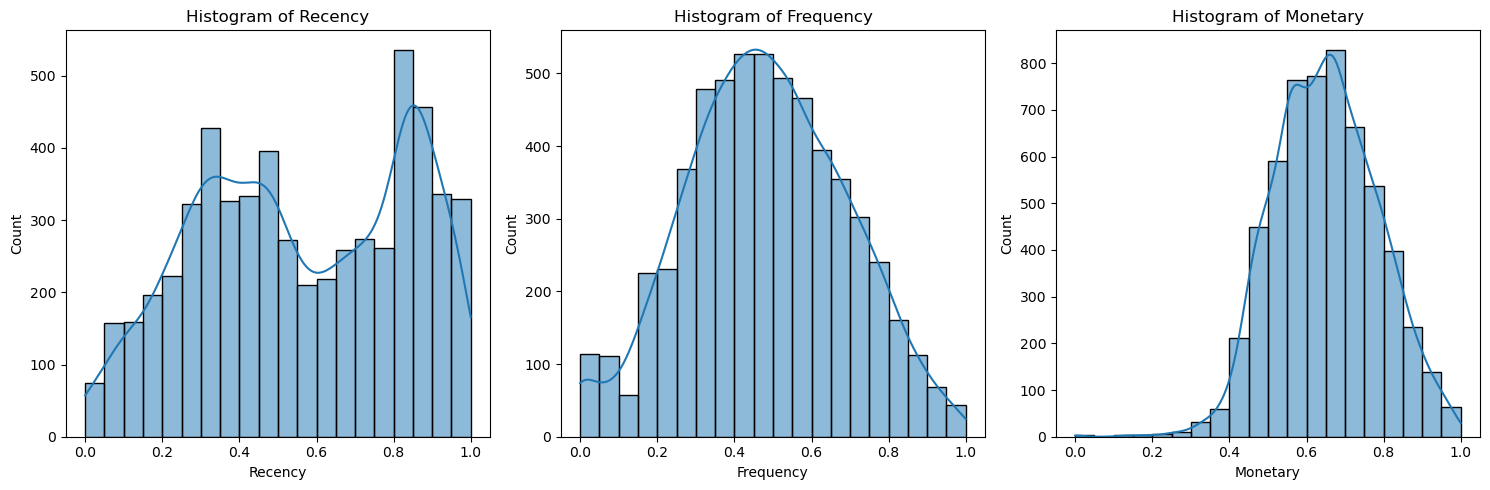

In [41]:
plt.figure(figsize=(15, 5))
# Draw the histograms
for i, column in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_standardized[column], kde=True, bins=20)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

In [42]:
df_standardized.skew()

Recency     -0.129505
Frequency   -0.008223
Monetary    -0.000009
dtype: float64

### Calculating Silhouette Scores For K-Means

In [43]:
# Dictionary to store silhouette scores
silhouette_scores = {}
# Calculate silhouette scores for different numbers of clusters
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k,max_iter=50).fit(df_standardized)
    score = silhouette_score(df_standardized, kmeans.labels_)
    silhouette_scores[k] = score

# Print silhouette scores
for k, score in silhouette_scores.items():
    print(f"Silhouette score for {k} clusters: {score}")

Silhouette score for 2 clusters: 0.4475532185893438
Silhouette score for 3 clusters: 0.37530639755323075
Silhouette score for 4 clusters: 0.3529009235545557
Silhouette score for 5 clusters: 0.31291989808438325
Silhouette score for 6 clusters: 0.3108791938726819
Silhouette score for 7 clusters: 0.29002029946912594
Silhouette score for 8 clusters: 0.2922866132147476


### K-means Model Building - Selected 3 Clusters

In [44]:
kmeans =KMeans(n_clusters=3,max_iter=50)
kmeans.fit(df_standardized)
df_standardized['cluster']=kmeans.labels_
df_standardized.head()

,Recency,Frequency,Monetary,cluster
0,0.052885,0.735641,0.845426,2
1,0.494317,0.475460,0.736946,1
2,0.287512,0.673667,0.819775,2
3,0.779467,0.312303,0.552464,0
4,0.824466,0.342523,0.541875,0


### Data Visualization

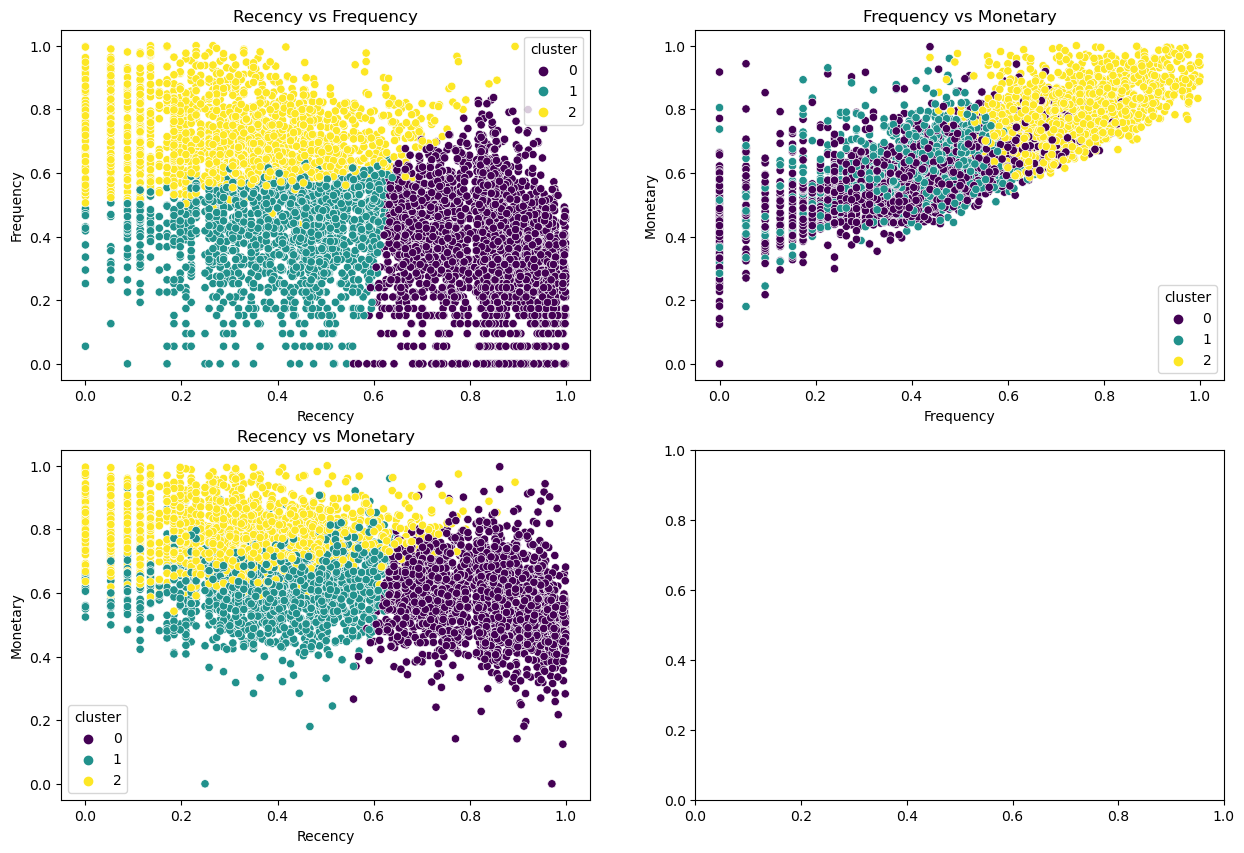

In [66]:
#Create a subplot grid of 2x2
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
df =df_standardized
# Scatter plot of Recency vs Frequency
sns.scatterplot(data=df, x='Recency', y='Frequency', hue='cluster',palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title('Recency vs Frequency')

# Scatter plot of Frequency vs Monetary
sns.scatterplot(data=df, x='Frequency', y='Monetary', hue='cluster',palette='viridis', ax=axs[0, 1])
axs[0, 1].set_title('Frequency vs Monetary')

# Scatter plot of Recency vs Monetary
sns.scatterplot(data=df, x='Recency', y='Monetary', hue='cluster',palette='viridis', ax=axs[1, 0])
axs[1, 0].set_title('Recency vs Monetary')
# Show plot
plt.show()


Plotting Recency and monetary: from the graph we can say that the yellow group the ones who like to spend more and  not much recent except few.

Plotting Frequency and Monetary: even here the yellow group of customers tried to purchase more and frequently whereas the blue group is very little frequency and spends very little.

Plotting Frequency and Recency: 
the yellow group frequently purchases products, but Not that Recent  The green ones tried to purchase recently but they are not frequent buyers so it means they are the new customers.

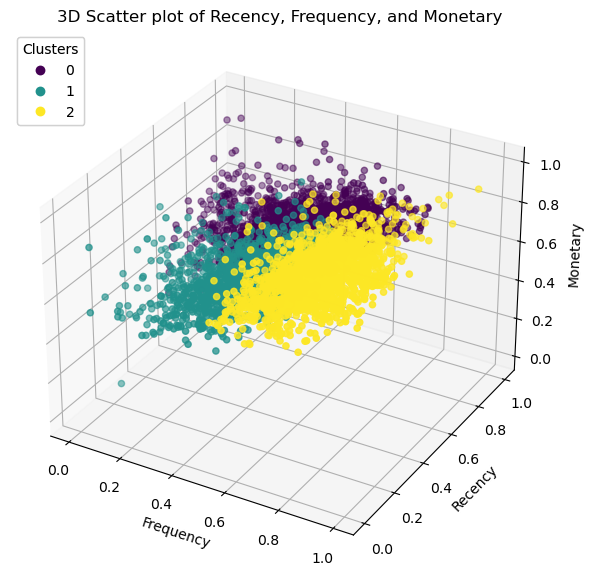

In [65]:
# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df['Frequency'], df['Recency'],
                     df['Monetary'], c=df['cluster'])

# Labels and title
ax.set_xlabel('Frequency',fontsize=10)
ax.set_ylabel('Recency',fontsize=10)
ax.set_zlabel('Monetary',fontsize=10)
ax.set_title('3D Scatter plot of Recency, Frequency, and Monetary')

# Legend
legend = ax.legend(*scatter.legend_elements(), loc="upper left", title="Clusters")
ax.add_artist(legend)

# Show plot
plt.show()

From this plot, we can see Yellow group customers have not spent a lot of money but frequently stop by the site and have made purchases recently that also fall into the high-value category.